In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [48]:
dataframe=pd.read_csv('./data/magic.csv', header=None)
dataframe = dataframe.rename(columns={dataframe.columns[-1]: 'type'}) #data represntation in dataframe
dataframe

,0,1,2,3,4,5,6,7,8,9,type
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


<Axes: ylabel='count'>

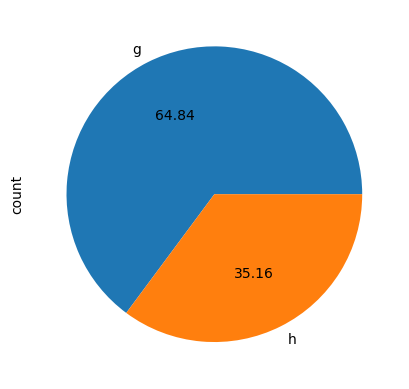

In [49]:
dataframe['type'].value_counts().plot.pie(autopct='%.2f') #plot of the data before balancing

In [50]:
dataframe_copy = dataframe.copy()
dataframe_copy['is_gamma'] = dataframe['type'].apply(lambda x: 1 if x == 'g' else 0) #making a copy of the datadset
dataframe_copy.drop(['type'], axis=1, inplace=True)

In [51]:
y = dataframe_copy['is_gamma']
x = dataframe_copy.drop(['is_gamma'], axis=1) #balancing data process
x

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [52]:
random_under_sampler = RandomUnderSampler(sampling_strategy=1) #under sampling of data
x_res, y_res = random_under_sampler.fit_resample(x, y)

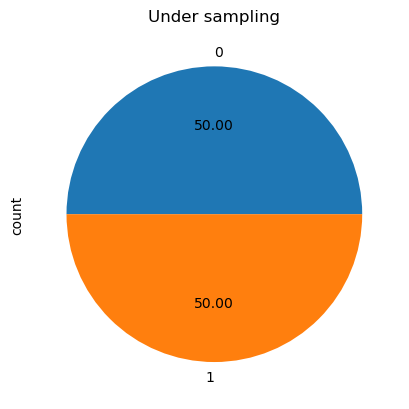

In [53]:
ax = y_res.value_counts().plot.pie(autopct = '%.2f') #ploting data after under sampling and balancing
_=ax.set_title("Under sampling")

In [54]:
x_train, x_validationAndTesting, y_train, y_validationAndTesting = train_test_split(x_res, y_res, train_size=0.7)
x_validation,x_test, y_validation,  y_test = train_test_split(x_validationAndTesting, y_validationAndTesting, train_size=0.5)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  #spliting the data to train, validation and testing
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)

# now let's create the decision tree classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier 

treeClassifier = DecisionTreeClassifier()
treeClassifier.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [56]:
from sklearn import tree
from sklearn.tree import export_text
decision_tree = treeClassifier.fit(x_train, y_train)

tree_rules = export_text(decision_tree)
print(tree_rules)


|--- feature_8 <= -0.44
|   |--- feature_0 <= 1.20
|   |   |--- feature_4 <= 0.79
|   |   |   |--- feature_6 <= -1.07
|   |   |   |   |--- feature_1 <= 0.65
|   |   |   |   |   |--- feature_8 <= -1.00
|   |   |   |   |   |   |--- feature_5 <= -1.52
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_5 >  -1.52
|   |   |   |   |   |   |   |--- feature_6 <= -1.76
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  -1.76
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.01
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  0.01
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.16
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  -1.00
|   |   |   |   |   |   |--- feature_2 <= -0.37
|   |   |   |   |   |   |   |--- 

# Validate the model

check the confusion matrix to validate the model

<function matplotlib.pyplot.show(close=None, block=None)>

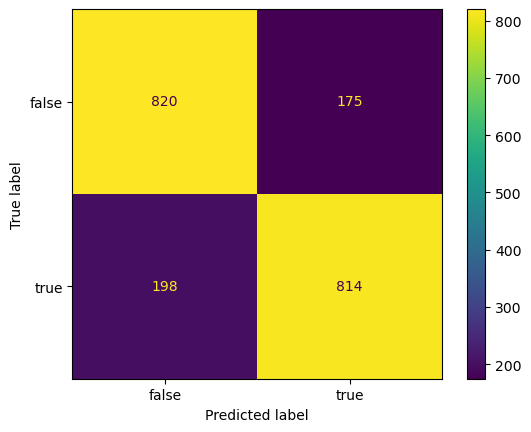

In [57]:

from sklearn import metrics
import numpy as np
y_prediction = decision_tree.predict(x_test)


confusionMatrix=metrics.confusion_matrix(y_test, y_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['false', 'true'])

cm_display.plot()
plt.show

# classification report

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       995
           1       0.82      0.80      0.81      1012

    accuracy                           0.81      2007
   macro avg       0.81      0.81      0.81      2007
weighted avg       0.81      0.81      0.81      2007

